In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/sample_data/train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract parts
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour


In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  hour        10886 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(8)
memory usage: 1.1

In [ ]:

if 'datetime' in df.columns:
  df=df.drop(columns='datetime')

In [ ]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,23.000000


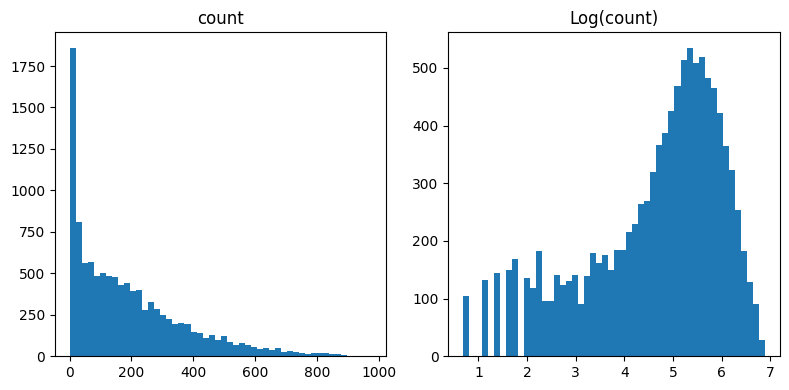

In [ ]:
# Target distribution
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(df['count'], bins=50)
plt.title('count')
plt.subplot(1,2,2)
plt.hist(np.log1p(df['count']), bins=50)
plt.title('Log(count)')
plt.tight_layout()
plt.show()

In [ ]:
# Numeric correlations
numeric_feats = df.select_dtypes(include=[np.number]).columns.tolist()


corr = df[numeric_feats].corr()['count'].abs().sort_values(ascending=False)
print('Top correlations with count: \n', corr.head(10))

Top correlations with count: 
 count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
humidity      0.317371
year          0.260403
month         0.166862
season        0.163439
Name: count, dtype: float64


In [ ]:
corr_numeric = corr.drop('count').dropna().head(100) # avoid any NaNs
top_numeric = corr_numeric.head(10).index.tolist()
print('Selected numeric features:', top_numeric)

Selected numeric features: ['registered', 'casual', 'hour', 'temp', 'atemp', 'humidity', 'year', 'month', 'season', 'weather']


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score


In [ ]:
# Prepare X and y for regression (log-transform target)
x=df.drop(columns=['count'],axis=1)
y = np.log1p(df['count'])

In [ ]:
x.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,1,4


In [ ]:
# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='median')),
('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
('num', numeric_transformer, top_numeric),
])





Starting XGBoost GridSearch (small grid)...
Best params: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__subsample': 0.8}
Best CV RMSE: 0.021737342837140447
XGBoost (best): RMSE mean=0.0168, std=0.0020

Final Evaluation on hold-out set:
Validation RMSE: 0.0002219230338850078
Validation MAE: 0.01098666566060295
Validation R2: 0.9998921921431623


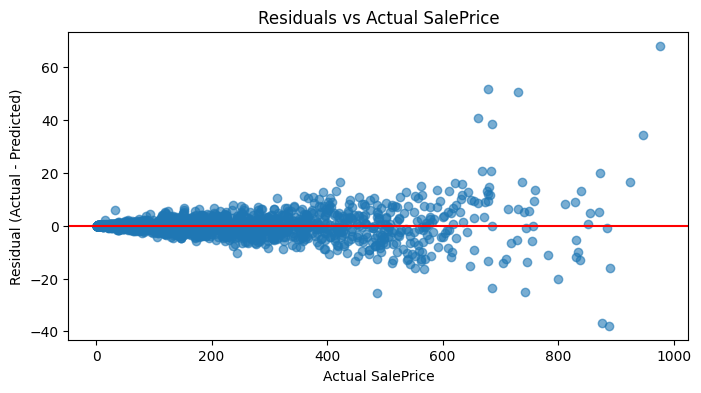

In [ ]:
# -------------------------
#  Boosting ensemble: XGBoost (main ensemble choice)
# -------------------------
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, random_state=42, verbosity=0)


pipe_xgb = Pipeline(steps=[('pre', preprocessor), ('model', xgb_model)])


# Quick hyperparameter grid (small) to keep runtime reasonable in Colab
param_grid = {
'model__max_depth': [3, 5],
'model__learning_rate': [0.05, 0.1],
'model__subsample': [0.8, 1.0]
}


gs = GridSearchCV(pipe_xgb, param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=1)
print('\nStarting XGBoost GridSearch (small grid)...')
gs.fit(x, y)
print('Best params:', gs.best_params_)
print('Best CV RMSE:', -gs.best_score_)


best_xgb = gs.best_estimator_


# Cross-validated RMSE for best_xgb
scores_xgb = -cross_val_score(best_xgb, x,y, cv=5, scoring='neg_root_mean_squared_error')
print(f"XGBoost (best): RMSE mean={scores_xgb.mean():.4f}, std={scores_xgb.std():.4f}")


# -------------------------
#  Final fit and evaluation on hold-out split
# -------------------------
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
final_model = best_xgb
final_model.fit(X_train, y_train)


y_pred = final_model.predict(X_val)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('\nFinal Evaluation on hold-out set:')
print('Validation RMSE:', mean_squared_error(y_val, y_pred))
print('Validation MAE:', mean_absolute_error(y_val, y_pred))
print('Validation R2:', r2_score(y_val, y_pred))


# Residual plot
plt.figure(figsize=(8,4))
residuals = np.expm1(y_val) - np.expm1(y_pred)
plt.scatter(np.expm1(y_val), residuals, alpha=0.6)
plt.axhline(0, color='r')
plt.xlabel('Actual SalePrice')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residuals vs Actual SalePrice')
plt.show()

In [ ]:
# === ) Save pipeline ===
import joblib
joblib.dump(best_xgb ,'xgb_model.pkl')
print("Saved pipeline to xgb_model.pkl")

Saved pipeline to xgb_model.pkl


In [ ]:
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 114.3 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

# app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from datetime import datetime

# Load trained model
model = joblib.load('xgb_model.pkl')

# Streamlit configuration
st.set_page_config(page_title="Bike Rental Prediction", page_icon="🚴", layout="centered")

st.title("🚴‍♂️ Bike Rental Demand Prediction App")
st.markdown("""
This app predicts the **number of total bike rentals** based on weather, time, and other conditions.
Fill in the details below and click **Predict Rentals** to see the estimated count!
""")

# === User Input Section ===
with st.form("input_form"):
    st.header("🧾 Input Features")

    # Date and time
    date_input = st.date_input("📅 Select Date")
    time_input = st.time_input("⏰ Select Time")

    year = date_input.year
    month = date_input.month
    hour = time_input.hour

    st.write("---")

    # Columns for categorical inputs
    col1, col2 = st.columns(2)
    with col1:
        season = st.selectbox("🌸 Season", [1, 2, 3, 4],
                              format_func=lambda x: ["Spring", "Summer", "Fall", "Winter"][x - 1])
        weather = st.selectbox("🌤️ Weather Condition", [1, 2, 3, 4],
                               format_func=lambda x: [
                                   "Clear / Few Clouds / Partly Cloudy",
                                   "Mist / Cloudy",
                                   "Light Snow or Rain",
                                   "Heavy Rain / Snow / Storm"
                               ][x - 1])
    with col2:
        holiday = st.selectbox("🎉 Is it a Holiday?", [0, 1],
                               format_func=lambda x: "Yes" if x == 1 else "No")
        workingday = st.selectbox("💼 Is it a Working Day?", [0, 1],
                                  format_func=lambda x: "Yes" if x == 1 else "No")

    st.write("---")

    # Numeric weather features
    col3, col4 = st.columns(2)
    with col3:
        temp = st.number_input("🌡️ Temperature (°C)", 0.0, 50.0, 22.0)
        atemp = st.number_input("🧣 Feels-like Temperature (°C)", 0.0, 50.0, 24.0)
    with col4:
        humidity = st.number_input("💧 Humidity (%)", 0, 100, 60)
        windspeed = st.number_input("💨 Wind Speed", 0.0, 60.0, 12.0)

    st.write("---")

    # User type inputs
    col5, col6 = st.columns(2)
    with col5:
        casual = st.number_input("🚶 Casual Users (non-registered)", 0, 5000, 50)
    with col6:
        registered = st.number_input("👥 Registered Users", 0, 10000, 200)

    submitted = st.form_submit_button("🔮 Predict Rentals")

# === Prediction Section ===
if submitted:
    # Prepare data for prediction
    input_data = pd.DataFrame({
        'season': [season],
        'holiday': [holiday],
        'workingday': [workingday],
        'weather': [weather],
        'temp': [temp],
        'atemp': [atemp],
        'humidity': [humidity],
        'windspeed': [windspeed],
        'casual': [casual],
        'registered': [registered],
        'year': [year],
        'month': [month],
        'hour': [hour]
    })

    # Predict
    prediction_log = model.predict(input_data)
    prediction = np.expm1(prediction_log)[0]

    # Display result
    st.success(f"### 🚲 Estimated Total Rentals: {int(prediction):,}")
    st.balloons()

    st.write("---")
    st.subheader("📊 Prediction Summary")
    st.bar_chart(pd.DataFrame({"Predicted Rentals": [prediction]}, index=["Prediction"]))



Writing app.py


In [ ]:
!pip install pyngrok --quiet

# Kill all previous ngrok and streamlit background processes
!pkill -f ngrok
!pkill -f streamlit

In [ ]:
# =========================
#  Deploy Streamlit with ngrok
# =========================


from pyngrok import ngrok
import threading, time, os

NGROK_AUTH_TOKEN = "33TNQvOn43typGkgG3zH0yGAc70_gLYWhP2CNLy99KX9i64d"
os.system(f"ngrok config add-authtoken {NGROK_AUTH_TOKEN}")

def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit)
thread.start()
time.sleep(10)

public_url = ngrok.connect(8501)
print("Your Streamlit app is live here:", public_url)

Your Streamlit app is live here: NgrokTunnel: "https://eryn-nonoperable-carmon.ngrok-free.dev" -> "http://localhost:8501"
